## WGCNA: Range effects

In the second WGCNA analysis, we will use the dataset that excludes the FP samples to look at the effects of range. This follows the same steps as the first analysis comparing infected vs. control overall, so there is less commenting here. Some parameters are modified; they will be pointed out. 

Again, if you have already performed module construction (steps `adjacency()`, `TOMsimilarity()`, and `flashClust()`) and saved the output (`dissTOM` and `geneTree`), you can skip all steps through module construction and load in saved objects for downstream use. Just make sure to also generate and process the `vsd` and `coldata` objects.

Load in the package.

In [1]:
library(WGCNA)
options(stringsAsFactors = FALSE)

Loading required package: dynamicTreeCut
Loading required package: fastcluster

Attaching package: ‘fastcluster’

The following object is masked from ‘package:stats’:

    hclust



Attaching package: ‘WGCNA’

The following object is masked from ‘package:stats’:

    cor



Read in the data. 

In [2]:
vsd <- read.table("../outputs/WGCNA_range.tsv", sep="\t")

Take a look.

In [3]:
head(vsd)
dim(vsd)

,AP_C_1,AP_C_2,AP_C_3,AP_C_4,AP_C_5,AP_P_1,AP_P_2,AP_P_3,AP_P_6,LA_C_1,...,NJ_P_7,SC_C_12,SC_C_14,SC_C_2,SC_C_6,SC_C_7,SC_C_9,SC_P_1,SC_P_2,SC_P_3
TRINITY_DN34991_c0_g1_i1,3.667672,5.146629,3.468810,4.286070,5.330060,5.124463,3.870840,4.078701,4.744610,3.690676,...,4.320244,3.359718,3.347260,2.388179,4.239768,3.663041,3.659161,3.544759,3.340737,4.161413
TRINITY_DN22619_c0_g1_i1,8.418507,8.790312,8.251599,8.630656,8.231984,8.445249,8.498467,8.002437,9.011492,8.039195,...,8.531485,8.768633,8.137682,7.804379,8.326060,7.944284,8.418023,8.911881,8.188620,8.562043
TRINITY_DN44279_c0_g1_i1,6.491170,6.310228,7.131687,6.974918,5.763932,7.199630,7.143992,9.048284,6.501610,6.360838,...,6.255875,4.759548,7.001339,4.840973,3.447762,5.516954,6.440005,3.425001,6.055815,6.251723
TRINITY_DN40042_c0_g1_i1,5.909801,5.480653,5.278401,5.242144,5.132785,5.299542,5.114659,5.922949,5.294022,5.244730,...,4.993007,5.099073,5.499877,5.748534,5.194059,5.356922,4.988766,5.535776,3.996319,5.088683
TRINITY_DN3373_c0_g1_i1,5.937095,4.497674,4.561425,5.406325,4.592452,6.115112,4.891276,4.600914,6.341735,4.100309,...,5.502322,5.099073,4.692182,4.625018,4.952361,4.203520,5.115246,5.360988,5.041165,4.816895
TRINITY_DN76095_c0_g1_i1,3.667672,3.638008,3.815247,3.841551,2.759897,4.192554,4.058440,4.980899,3.358205,4.672461,...,3.610183,3.730050,2.722394,3.935361,3.630998,3.663041,3.569987,3.755722,4.557033,3.898921


[1] 59579    58

Looks good. Now let's transpose it.

In [4]:
vsd <- t(vsd)
vsd[1:6,1:6]
dim(vsd)

,TRINITY_DN34991_c0_g1_i1,TRINITY_DN22619_c0_g1_i1,TRINITY_DN44279_c0_g1_i1,TRINITY_DN40042_c0_g1_i1,TRINITY_DN3373_c0_g1_i1,TRINITY_DN76095_c0_g1_i1
AP_C_1,3.667672,8.418507,6.491170,5.909801,5.937095,3.667672
AP_C_2,5.146629,8.790312,6.310228,5.480653,4.497674,3.638008
AP_C_3,3.468810,8.251599,7.131687,5.278401,4.561425,3.815247
AP_C_4,4.286070,8.630656,6.974918,5.242144,5.406325,3.841551
AP_C_5,5.330060,8.231984,5.763932,5.132785,4.592452,2.759897
AP_P_1,5.124463,8.445249,7.199630,5.299542,6.115112,4.192554


[1]    58 59579

Now we check to see if there are any genes or samples with too many missing values.

In [5]:
gsg = goodSamplesGenes(vsd, verbose = 3)
gsg$allOK

 Flagging genes and samples with too many missing values...
  ..step 1


[1] TRUE

Good. Now we'll cluster the samples to identify outliers.

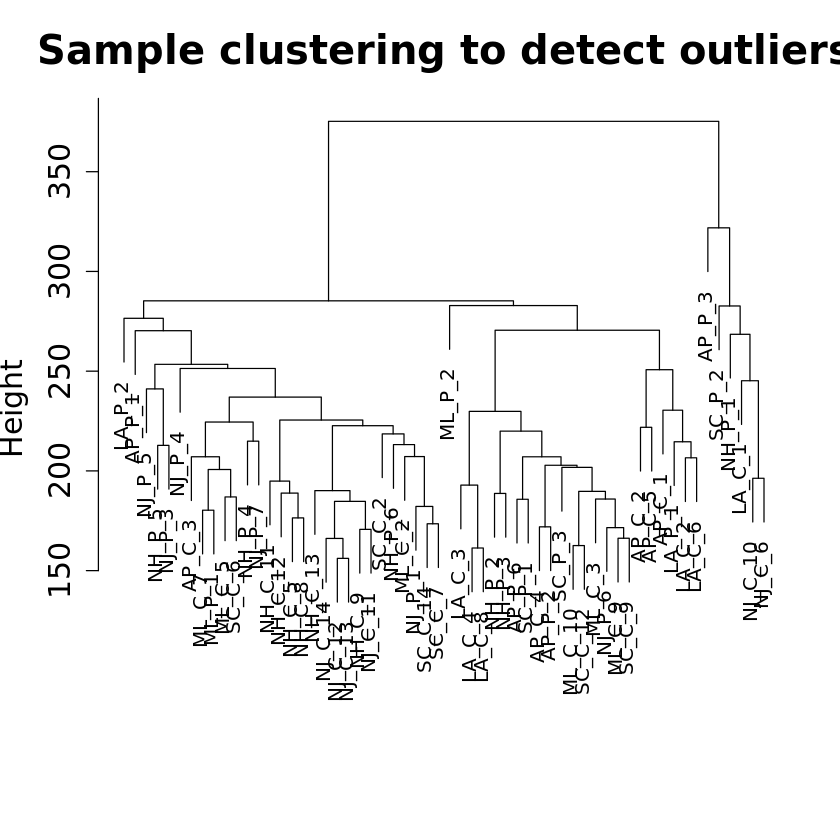

In [6]:
tree = hclust(dist(vsd), method = "average");
plot(tree, main = "Sample clustering to detect outliers", sub="", xlab="", cex.lab = 1.5,
cex.axis = 1.5, cex.main = 2)

In [7]:
enableWGCNAThreads()

Allowing parallel execution with up to 35 working processes.


In [8]:
sft = pickSoftThreshold(vsd, verbose = 5, networkType="signed")

pickSoftThreshold: will use block size 750.
 pickSoftThreshold: calculating connectivity for given powers...
   ..working on genes 1 through 750 of 59579
   ..working on genes 751 through 1500 of 59579
   ..working on genes 1501 through 2250 of 59579
   ..working on genes 2251 through 3000 of 59579
   ..working on genes 3001 through 3750 of 59579
   ..working on genes 3751 through 4500 of 59579
   ..working on genes 4501 through 5250 of 59579
   ..working on genes 5251 through 6000 of 59579
   ..working on genes 6001 through 6750 of 59579
   ..working on genes 6751 through 7500 of 59579
   ..working on genes 7501 through 8250 of 59579
   ..working on genes 8251 through 9000 of 59579
   ..working on genes 9001 through 9750 of 59579
   ..working on genes 9751 through 10500 of 59579
   ..working on genes 10501 through 11250 of 59579
   ..working on genes 11251 through 12000 of 59579
   ..working on genes 12001 through 12750 of 59579
   ..working on genes 12751 through 13500 of 59579
   ..

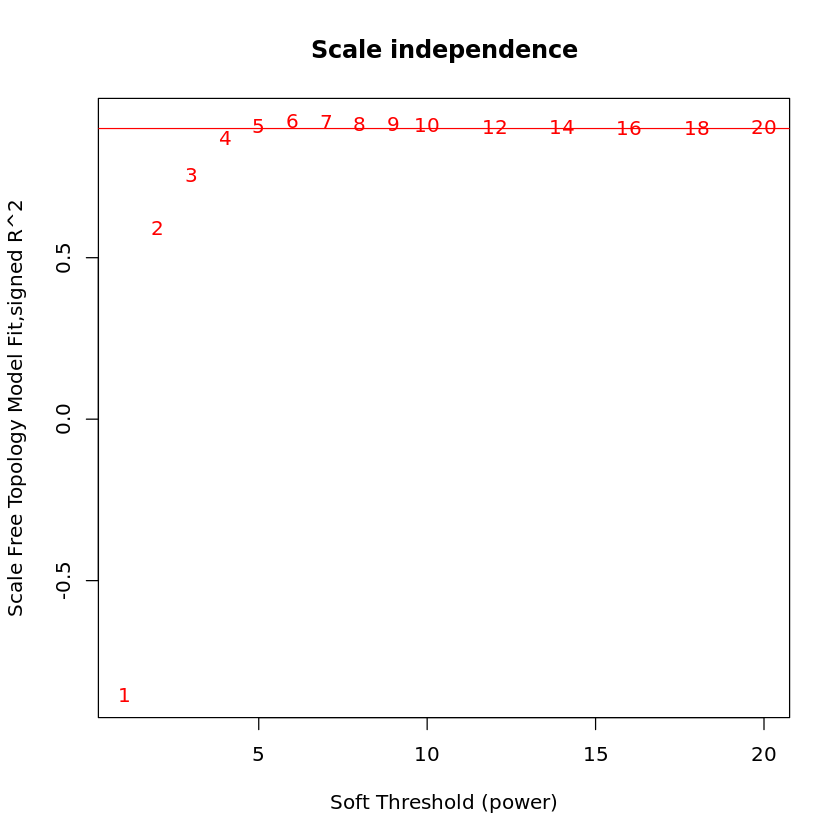

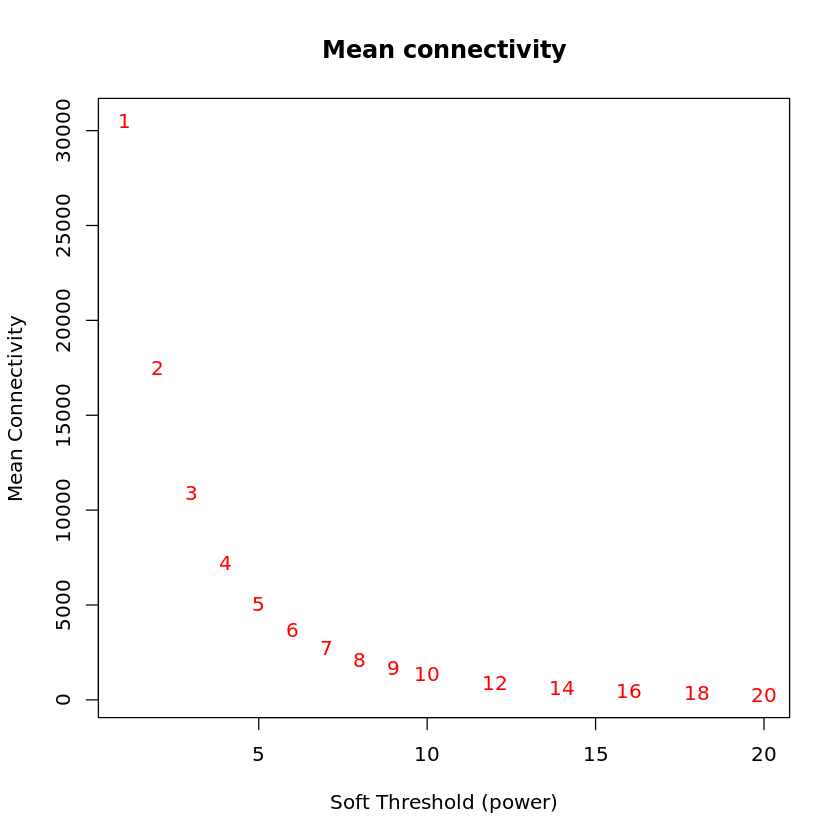

In [9]:
plot(sft$fitIndices[,1], -sign(sft$fitIndices[,3])*sft$fitIndices[,2],
    xlab="Soft Threshold (power)",ylab="Scale Free Topology Model Fit,signed R^2",type="n",
    main = paste("Scale independence"))
text(sft$fitIndices[,1], -sign(sft$fitIndices[,3])*sft$fitIndices[,2],
    labels=c(seq(1, 10, by = 1), seq(12, 20, by = 2)),col="red") #labels from default for power vector
abline(h=0.90,col="red")
plot(sft$fitIndices[,1], sft$fitIndices[,5],
    xlab="Soft Threshold (power)",ylab="Mean Connectivity", type="n",
    main = paste("Mean connectivity"))
    text(sft$fitIndices[,1], sft$fitIndices[,5], labels=c(seq(1, 10, by = 1), seq(12, 20, by = 2)), col="red")

We are going to pick a power of 6, as in the first analysis. 

Now we'll do the module construction. 

In [10]:
library(flashClust)
adjacency = adjacency(vsd, power = 6,type="signed")
TOM = TOMsimilarityFromExpr(vsd,networkType = "signed", TOMType = "signed", power = 6)
dissTOM = 1-TOM
geneTree = flashClust(as.dist(dissTOM),method="average")
save(dissTOM,geneTree,file="signedDissTOM_tree_range.RData")


Attaching package: ‘flashClust’

The following object is masked from ‘package:fastcluster’:

    hclust

The following object is masked from ‘package:stats’:

    hclust



TOM calculation: adjacency..
..will use 35 parallel threads.
 Fraction of slow calculations: 0.000000
..connectivity..
..matrix multiplication (system BLAS)..
..normalization..
..done.


In [ ]:
load(file="signedDissTOM_tree_range.RData")

In [11]:
minModuleSize = 20;
# Module identification using dynamic tree cut:
dynamicMods = cutreeDynamic(dendro = geneTree, distM = dissTOM,
deepSplit = 4, pamRespectsDendro = FALSE,
minClusterSize = minModuleSize);
table(dynamicMods)
dynamicColors = labels2colors(dynamicMods)

 ..cutHeight not given, setting it to 0.972  ===>  99% of the (truncated) height range in dendro.
 ..done.


dynamicMods
    1     2     3     4     5     6     7     8     9    10    11    12    13 
33507 10640  7393  2060  1240   695   598   458   370   288   282   224   203 
   14    15    16    17    18    19    20    21    22    23    24    25    26 
  187   185   123   110   100    87    79    78    64    58    58    56    55 
   27    28    29    30    31    32    33    34    35    36 
   53    45    45    44    41    35    34    30    29    25 

In [12]:
library(flashClust)
MEList = moduleEigengenes(vsd, colors = dynamicColors)
MEs = MEList$eigengenes
# Calculate dissimilarity of module eigengenes
MEDiss = 1-cor(MEs);
METree = flashClust(as.dist(MEDiss), method = "average");

save(dynamicMods,dynamicColors,MEs,METree,geneTree,file="1stPassModules_range.RData")

In [13]:
load(file="1stPassModules_range.RData")

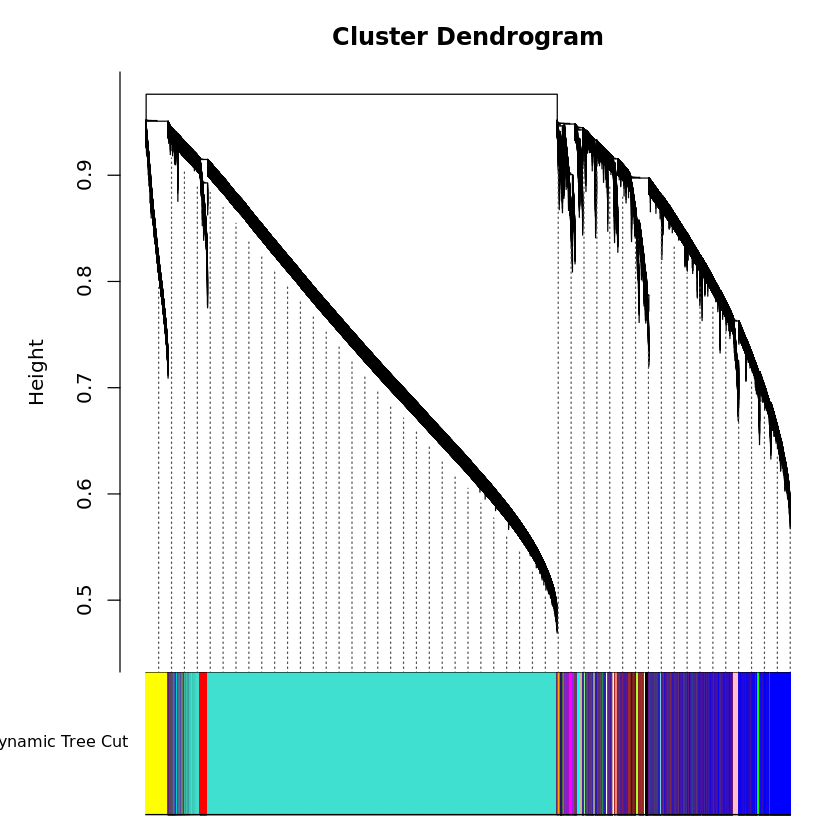

In [14]:
plotDendroAndColors(geneTree, dynamicColors,
c("Dynamic Tree Cut"),
dendroLabels = FALSE, hang = 0.03,
addGuide = TRUE, guideHang = 0.05)

The dissimilarity threshold is raised to 0.15 from 0.1 in the first analysis. Merging at 0.1 was resulting in too many modules of small size. 

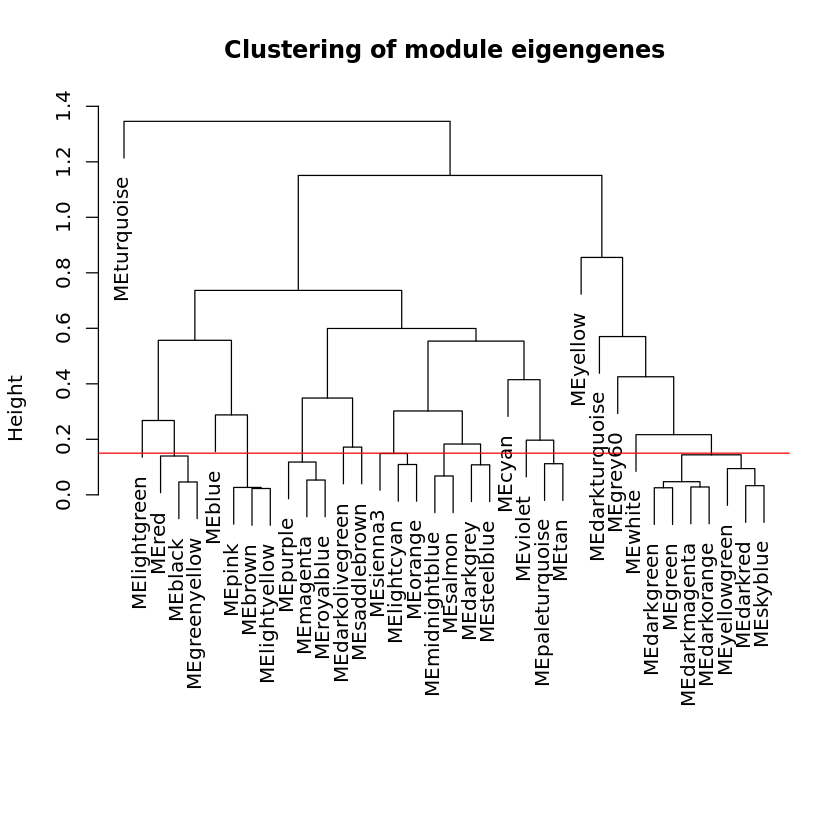

In [15]:
#sizeGrWindow(7, 6)
plot(METree, main = "Clustering of module eigengenes",
xlab = "", sub = "")
MEDissThres = 0.15
# Plot the cut line into the dendrogram
abline(h=MEDissThres, col = "red")

In [16]:
merge = mergeCloseModules(vsd, dynamicColors, cutHeight = MEDissThres, verbose = 3)
# The merged module colors
mergedColors = merge$colors;
# Eigengenes of the new merged modules:
mergedMEs = merge$newMEs

 mergeCloseModules: Merging modules whose distance is less than 0.15
   multiSetMEs: Calculating module MEs.
     Working on set 1 ...
     moduleEigengenes: Calculating 36 module eigengenes in given set.
   multiSetMEs: Calculating module MEs.
     Working on set 1 ...
     moduleEigengenes: Calculating 19 module eigengenes in given set.
   Calculating new MEs...
   multiSetMEs: Calculating module MEs.
     Working on set 1 ...
     moduleEigengenes: Calculating 19 module eigengenes in given set.


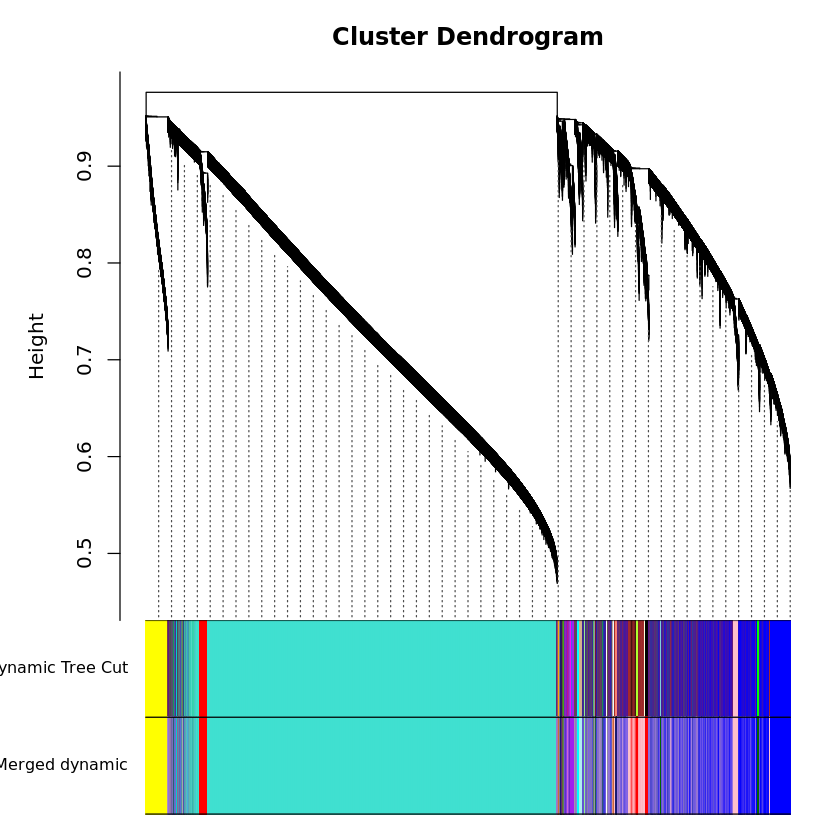

In [17]:
plotDendroAndColors(geneTree, cbind(dynamicColors, mergedColors),
c("Dynamic Tree Cut", "Merged dynamic"),
dendroLabels = FALSE, hang = 0.03,
addGuide = TRUE, guideHang = 0.05)

In [18]:
moduleColors = mergedColors
# Construct numerical labels corresponding to the colors
colorOrder = c("grey", standardColors(50));
moduleLabels = match(moduleColors, colorOrder)-1;
MEs = mergedMEs;


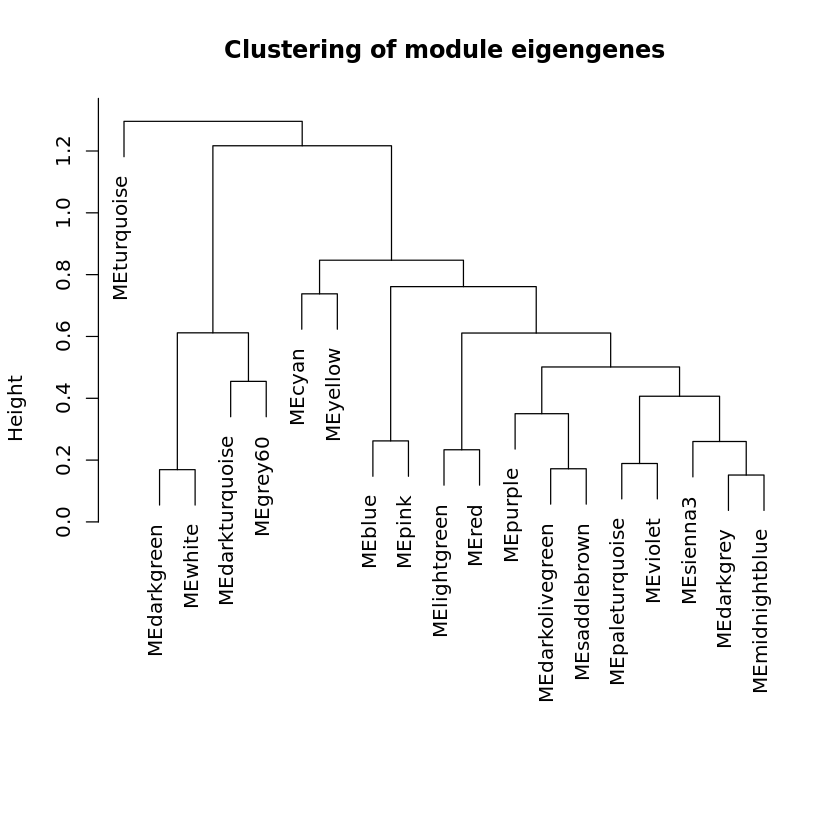

In [19]:
MEDiss = 1-cor(MEs);
# Cluster module eigengenes
METree = flashClust(as.dist(MEDiss), method = "average");
# Plot the result
plot(METree, main = "Clustering of module eigengenes",
xlab = "", sub = "")

In [20]:
table(moduleColors)

moduleColors
          blue           cyan      darkgreen       darkgrey darkolivegreen 
         10640            187           1537            102             34 
 darkturquoise         grey60     lightgreen   midnightblue  paleturquoise 
            58            110            100            388            265 
          pink         purple            red    saddlebrown        sienna3 
          7938            737           1575             45            208 
     turquoise         violet          white         yellow 
         33507             35             53           2060 

In [21]:
save(MEs, geneTree, moduleLabels, moduleColors, file = "networkdata_signed_range.RData")

## Trait data correlations

Here we are going to use a similar approach, but instead of pasting sex and condition together and making contrasts to look at modules that may be related to male feminization, we are going to paste range and condition to look at which modules may show range specific responses to infection.

In [22]:
coldata <- read.table("../metadata/DESeq2_coldata.txt", row.names=1, col.names=c("","site","condition","range","sex"), stringsAsFactors = FALSE)
coldata <- coldata[rownames(vsd),-c(1,4)]
coldata$range.condition <- paste(coldata$range, coldata$condition)
head(coldata)
dim(coldata)

,condition,range,range.condition
AP_C_1,C,Native,Native C
AP_C_2,C,Native,Native C
AP_C_3,C,Native,Native C
AP_C_4,C,Native,Native C
AP_C_5,C,Native,Native C
AP_P_1,P,Native,Native P


[1] 58  3

Change the first `binarizeCategoricalColumns()` call, flipping booleans of `includePairwise = TRUE` and `includeLevelVsAll = FALSE`, to switch between pairwise comparisons between range:condition combos and versus all comparisons. First re-run code block above to regenerate `coldata`. Save to filenames accordingly below when exporting. 

In [23]:
coldata <- binarizeCategoricalColumns(coldata, 
      convertColumns = "range.condition", 
      includePairwise = TRUE, includeLevelVsAll = FALSE)
coldata <- binarizeCategoricalColumns(coldata, 
      convertColumns = c("condition"), 
      includePairwise = TRUE, includeLevelVsAll = FALSE)
coldata <- binarizeCategoricalColumns(coldata, 
      convertColumns = c("range"), 
      includePairwise = TRUE, includeLevelVsAll = FALSE)
head(coldata)

,condition.P.vs.C,range.Invasive.vs.Absent,range.Native.vs.Absent,range.Native.vs.Invasive,range.condition.Absent P.vs.Absent C,range.condition.Invasive C.vs.Absent C,range.condition.Invasive P.vs.Absent C,range.condition.Native C.vs.Absent C,range.condition.Native P.vs.Absent C,range.condition.Invasive C.vs.Absent P,range.condition.Invasive P.vs.Absent P,range.condition.Native C.vs.Absent P,range.condition.Native P.vs.Absent P,range.condition.Invasive P.vs.Invasive C,range.condition.Native C.vs.Invasive C,range.condition.Native P.vs.Invasive C,range.condition.Native C.vs.Invasive P,range.condition.Native P.vs.Invasive P,range.condition.Native P.vs.Native C
AP_C_1,0,NA,1,1,NA,NA,NA,1,NA,NA,NA,1,NA,NA,1,NA,1,NA,0
AP_C_2,0,NA,1,1,NA,NA,NA,1,NA,NA,NA,1,NA,NA,1,NA,1,NA,0
AP_C_3,0,NA,1,1,NA,NA,NA,1,NA,NA,NA,1,NA,NA,1,NA,1,NA,0
AP_C_4,0,NA,1,1,NA,NA,NA,1,NA,NA,NA,1,NA,NA,1,NA,1,NA,0
AP_C_5,0,NA,1,1,NA,NA,NA,1,NA,NA,NA,1,NA,NA,1,NA,1,NA,0
AP_P_1,1,NA,1,1,NA,NA,NA,NA,1,NA,NA,NA,1,NA,NA,1,NA,1,1


In [24]:
# Define numbers of genes and samples
nGenes = ncol(vsd);
nSamples = nrow(vsd);
# Recalculate MEs with color labels
MEs0 = moduleEigengenes(vsd, moduleColors)$eigengenes
MEs = orderMEs(MEs0)

#remove 'ME' at start of module names
#names(MEs) <- gsub('ME', '', names(MEs))

moduleTraitCor = cor(MEs, coldata, use = "p");
moduleTraitPvalue = corPvalueStudent(moduleTraitCor, nSamples);

In [25]:
# correlations of genes with eigengenes
moduleGeneCor=cor(MEs,vsd)
moduleGenePvalue = corPvalueStudent(moduleGeneCor, nSamples);

moduleTraitCor = cor(MEs, coldata, use = "p");
moduleTraitPvalue = corPvalueStudent(moduleTraitCor, nSamples);

png 
  2

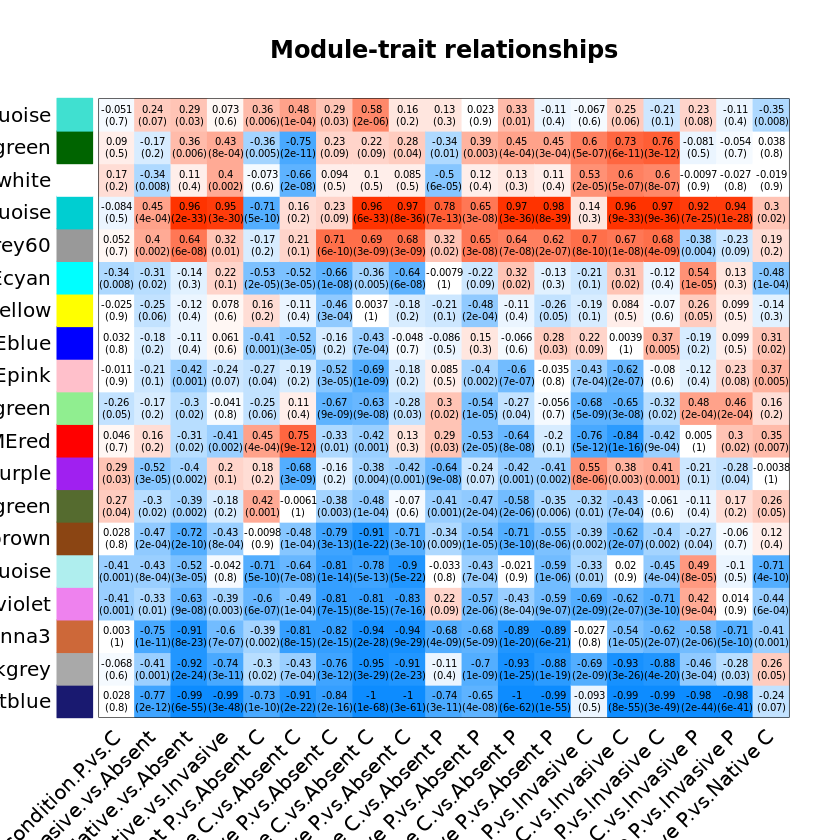

In [26]:
# Will display correlations and their p-values
textMatrix = paste(signif(moduleTraitCor, 2), "\n(",
signif(moduleTraitPvalue, 1), ")", sep = "");
dim(textMatrix) = dim(moduleTraitCor)
# Display the correlation values within a heatmap plot
png(filename="../vis/WGCNA_range_moduleCors_range-condition_pairwise.png", pointsize=40, height=2000, width=2500)
par(mar = c(13, 9, 3, 0))
labeledHeatmap(Matrix = moduleTraitCor,
        xLabels = names(coldata),
        yLabels = names(MEs),
        ySymbols = names(MEs),
        colorLabels = FALSE,
        plotLegend = FALSE,
        colors = blueWhiteRed(50),
        textMatrix = textMatrix,
        setStdMargins = FALSE,
        cex.text = 0.5,
        #showrRows = ,
        zlim = c(-1,1),
        main = paste("Module-trait relationships"))
dev.off()
labeledHeatmap(Matrix = moduleTraitCor,
        xLabels = names(coldata),
        yLabels = names(MEs),
        ySymbols = names(MEs),
        colorLabels = FALSE,
        plotLegend = FALSE,
        colors = blueWhiteRed(50),
        textMatrix = textMatrix,
        setStdMargins = FALSE,
        cex.text = 0.5,
        #showrRows = ,
        zlim = c(-1,1),
        main = paste("Module-trait relationships"))

Clear environment for easy loading next time.

In [ ]:
rm(list = ls())